In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/dataset.csv')  # Replace with your dataset path

# Check the first few rows and the columns
print(data.head())
print(data.columns)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


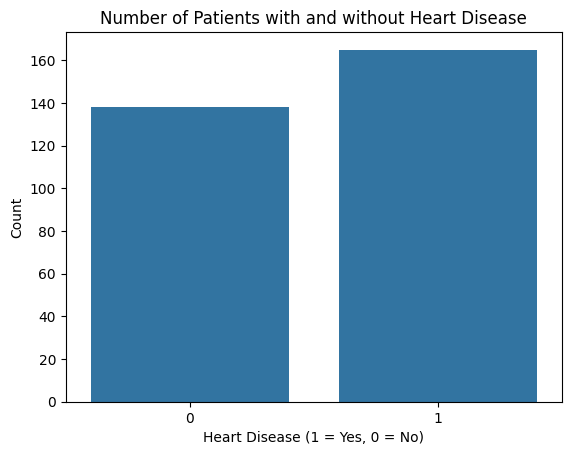

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the number of patients with and without heart disease
sns.countplot(x='target', data=data)  # Replace 'target' with the actual column name if different
plt.title('Number of Patients with and without Heart Disease')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

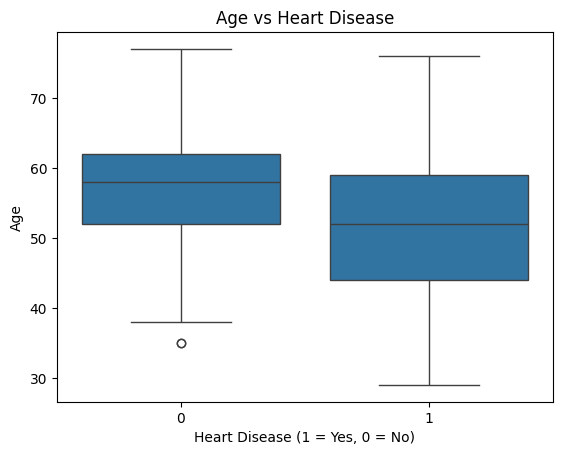

In [ ]:
# Visualize age vs heart disease
sns.boxplot(x='target', y='age', data=data)  # Ensure 'age' is the correct column name
plt.title('Age vs Heart Disease')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Age')
plt.show()

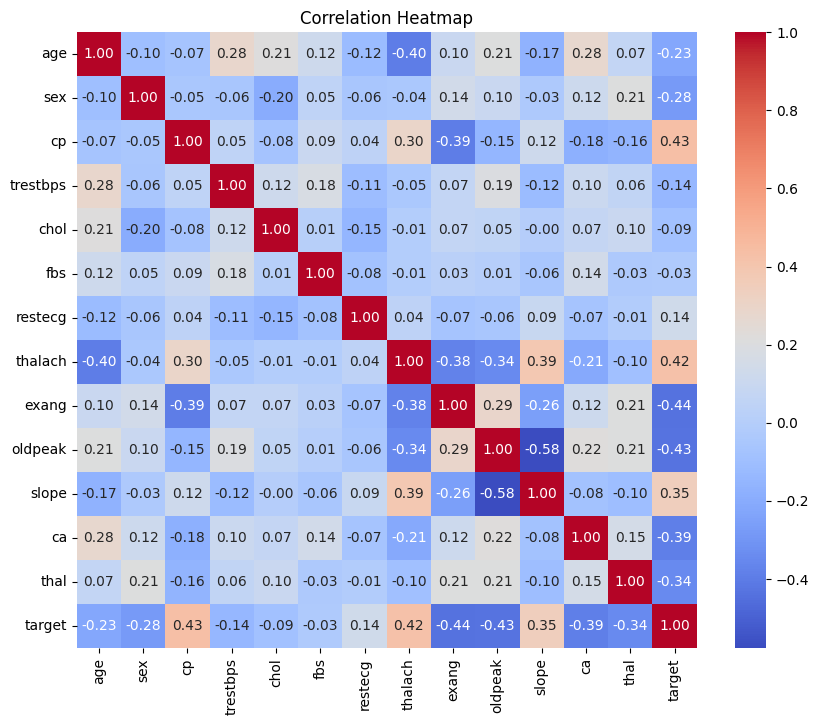

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Visualize correlation between all features using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Split the dataset into train and test sets
X = data.drop('target', axis=1)  # Features
y = data['target']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Confusion matrix and accuracy
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

print("Logistic Regression Confusion Matrix:\n", cm_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic)

Logistic Regression Confusion Matrix:
 [[32  9]
 [ 8 42]]
Logistic Regression Accuracy: 0.8131868131868132


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Build the decision tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = decision_tree_model.predict(X_test)

# Confusion matrix and accuracy
cm_tree = confusion_matrix(y_test, y_pred_tree)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

print("Decision Tree Confusion Matrix:\n", cm_tree)
print("Decision Tree Accuracy:", accuracy_tree)

# Visualize the decision tree
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(decision_tree_model, out_file=None,
                                  feature_names=X.columns,
                                  class_names=['No Disease', 'Disease'],
                                  filled=True, rounded=True,
                                  special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Saves the decision tree as a PDF

Decision Tree Confusion Matrix:
 [[31 10]
 [17 33]]
Decision Tree Accuracy: 0.7032967032967034


'decision_tree.pdf'

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Build the random forest model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# Predict on the test set
y_pred_forest = random_forest_model.predict(X_test)

# Confusion matrix and accuracy
cm_forest = confusion_matrix(y_test, y_pred_forest)
accuracy_forest = accuracy_score(y_test, y_pred_forest)

print("Random Forest Confusion Matrix:\n", cm_forest)
print("Random Forest Accuracy:", accuracy_forest)

# Visualize the random forest model
# Note: Visualizing Random Forest is more complex, typically involves feature importance
importances = random_forest_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt

Random Forest Confusion Matrix:
 [[33  8]
 [ 9 41]]
Random Forest Accuracy: 0.8131868131868132


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>